# 11일차 실습 - Seaborn 


### [실습] 확률과통계 기초실습문제

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#11-(a)
# 방법2: 2차원 리스트 이용
data = [[38,31,36,29,42,51,39,47,37,46,45,39],
        [22,14,20,14,23,40,22,31,22,37,25,24],
        [18,16,15,12,17,34,15,18,20,36,23,22]]
columns = ["00시","02시","04시","06시","08시","10시","12시","14시","16시","18시","20시","22시"]
df = pd.DataFrame(data, columns = columns)
df.columns.name = "시각"
df.index = ["BOD","COD","SS"]

# 11-(b)

plt.plot(columns,data[0],"ro--", label = "BOD")
plt.plot(columns,data[1],"b^-.", label = "COD")
plt.plot(columns,data[2],"gd",linestyle = "solid", label = "SS")
plt.grid()
plt.legend()


# # 방법2: 딕셔너리 이용
#11-(a)
data  = {'00시': [38,22,18], '02시': [31,14,16],
         '04시': [36,20,15], '06시': [29,14,12],
         '08시': [42,23,17], '10시': [51,40,34],
         '12시': [39,22,15], '14시': [47,31,18],
         '16시': [37,22,20], '18시': [46,37,36],
         '20시': [45,25,23], '22시': [39,24,22]}
df = pd.DataFrame(data, columns = columns)
df.columns.name = "시각"
df.index = ["BOD","COD","SS"]
df
# 11-(b)
x = df.columns
plt.plot(x, df.loc['BOD'],  "ro--", label = "BOD")
plt.plot(x, df.loc['COD'], "b^-.", label = "COD")
plt.plot(x, df.loc['SS'], "gd",linestyle = "solid", label = "SS")
plt.show()



In [ ]:

# 12-(a)
# 1.DataFrame 만들기
indexs = ["9.5~19.5","19.5~29.5","29.5~39.5","39.5~49.5","49.5~59.5","59.5~69.5"]
data = pd.Series([9,9,9,10,2,1])
df = pd.DataFrame(data, columns = ["도수"])
df.index = indexs
df.columns.name = "계급간격"
# 2.신규 추가 컬럼
df["상대도수"] = df.도수 / sum(df.도수)
df["계급값"]   = [14.5,24.5,34.5,44.5,54.5,64.5]
df["fx"]      = df.도수 * df.계급값
xm = (9 * 14.5 + 9 * 24.5 + 9 * 34.5 + 10 * 44.5 + 2 * 54.5 + 1 * 64.5) / 40
df["편차의제곱"] = (df.계급값 - xm)**2
df["편차제곱xfi"] = df.편차의제곱 * df.도수
df


# 12 - (b)
std = np.sqrt(sum(df.편차제곱xfi) / (40-1))
print(f'표본표준편차: {round(std,4)}')



In [ ]:
# 13-(a)
data = [12.6,10.5,25.2,20.9,29.5,28.3,12.9,11.2,26.1,
        23.6,18.2,13.1,14.8,11.1,10.2,16.9,26.7,16.7,23.6,17.5]


import math
# 1.k(계급 수)
k = 5
# 2.R(max - min)
R = max(data) - min(data)
# 3.계급간격
w = math.ceil(R/k)
# 4.시작계급값
s = min(data) - 0.5

# 전체 계급구간
bins = np.arange(s, max(data)+w, step=w)

# 계급구간
index = [f'{bins[i]}~{bins[i+1]}' for i in range(len(bins)) if i<len(bins)-1]

# 도수
hist, bins = np.histogram(data, bins)

# DataFrame으로 나타내기
df = pd.DataFrame(hist, index=index, columns=['도수'])
df.index.name = '계급간격'

df['계급값'] = [ int((bins[i]+bins[i+1])/2) for i in range(k)]
df

x = df.계급값.values
x = df.계급값
y = df.도수

plt.bar(x,y, edgecolor = "w", width = 4)
plt.plot(x,y,"ro-")
plt.show()

In [ ]:
# 방법2: pyplot.hist() 사용해서 도수다각형 그리기
a, b, c = plt.hist(data, bins=5, edgecolor='w')
print(f'도수:{a}, index시작:{b}, 객체정보:{c}')
index = [] 
for i in range(len(b)): 
    if i<len(b)-1:
        index.append( round((b[i]+b[i+1])/2,2) )
print(index)
plt.plot(index, a, 'ro-')
plt.xticks(index)
plt.show()

----
----

## 파이썬라이브러리 - Seaborn

### seaborn 설치하기

In [ ]:
!pip install seaborn

### seaborn 설치 확인하기

In [ ]:
import seaborn

seaborn.__version__

## Seaborn 사용 예제

### 1. Matplotlib과 기본 그래프 비교

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# warning 안나타나게 하는 방법
import warnings
warnings.filterwarnings(action='ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('default')

# 선 그래프
X = np.linspace(0, 10, 100)
Y = np.cos(X)
plt.subplot(3,2,1)
plt.plot(X, Y)
plt.title('Matplotlib.pyplot')
plt.subplot(3,2,2)
sns.lineplot(X, Y)
plt.title('Seaborn')

# 막대 그래프
X = np.arange(10)
Y = np.random.uniform(1,10,10)
plt.subplot(3,2,3)
plt.bar(X, Y)
plt.subplot(3,2,4)
sns.barplot(X, Y)


# 점 그래프
X = np.random.randn(100)
Y = np.random.randn(100)
plt.subplot(3,2,5)
plt.scatter(X, Y)
plt.subplot(3,2,6)
sns.scatterplot(X, Y)

plt.show()

### 2. Seaborn 내장 Dataset 사용해서 그래프 그리기

- 내장 Dataset csv파일 위치 : https://github.com/mwaskom/seaborn-data

#### - seaborn 데이터셋 목록

In [32]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

#### - seaborn 데이터셋 사용방법

In [ ]:
# 사이킷런 빌트인 데이터셋(sklearn.datasets): 붓꽃
from sklearn.datasets import load_iris
iris = load_iris()
iris

In [ ]:
# seaborn 빌트인 데이터셋 : tips
sns.load_dataset('tips').head(3) 
# type(sns.load_dataset('tips'))

#### -변수 사이의 관계 그래프로 나타내기 : pairplot()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset('tips')
print(tips.columns)

sns.set_style('darkgrid')
sns.pairplot(tips, hue='sex') # 두 변수 조합을 한번에 histogram형태로
# sns.pairplot(tips, hue='sex', height=3, aspect=4/3)

---------

## 1. Seaborn 기본 설정

#### - 한글, 폰트 크기, 그래프 크기, 그래프 스타일 설정
- set_style : darkgrid(default), whitegrid, dark, white, ticks

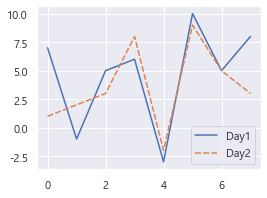

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# matplotlib 스타일
# plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.size'] = 15
# plt.rc("font", family='Malgun Gothic')
# plt.style.use('default')

# seaborn 스타일
# sns.set_theme()
sns.set(font='Malgun Gothic', font_scale=1,
        rc={'axes.unicode_minus':False, 'figure.figsize':(4,3)})

data = {'Day1': [7,-1,5,6,-3,10,5,8],
        'Day2': [1,2,3,8,-2,9,5,3]}
df = pd.DataFrame(data)

sns.lineplot(data=df)

# 스타일 종류: darkgrid(default), whitegrid, dark, white, ticks
# sns.set_style("white")
# sns.despine()
# sns.set_style('whitegrid')
# sns.despine(left=True, bottom=True, top=True, right=True)
# sns.despine(left=False, bottom=False, top=False, right=False)

------

## 2. Seaborn 그래프 

## 통계 용어
- 단순(simple): 독립변수(X) 1개 
- 다중(multi)  : 독립변수(X) 2개 이상    
- 일변량/단변량(univariate) : 종속변수(Y) 1개 (회귀분석, T-검정, ANOVA)
- 이변량(bivariate)    : 종속변수(Y) 2개  (상관분석)
- 다변량(multivariate) : 종속변수(Y) 2개 이상 (요인분석, 군집분석 등 ) 

### Multi-plot : 여러 개의 그래프 

#### - facetGrid: 다중 그래프를 그리기 위한 구조를 만드는 방법

In [34]:
tips = sns.load_dataset("tips")
penguins= sns.load_dataset("penguins")
anscombes = sns.load_dataset("anscombe")
titanic = sns.load_dataset("titanic")

tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


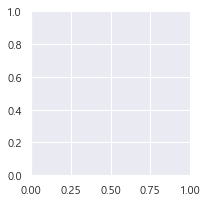

In [10]:
sns.FacetGrid(tips)

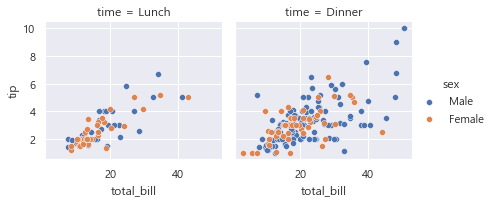

In [22]:
g = sns.FacetGrid(tips, col="time", hue="sex")
# g.map(sns.scatterplot, "total_bill", "tip")
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.add_legend()

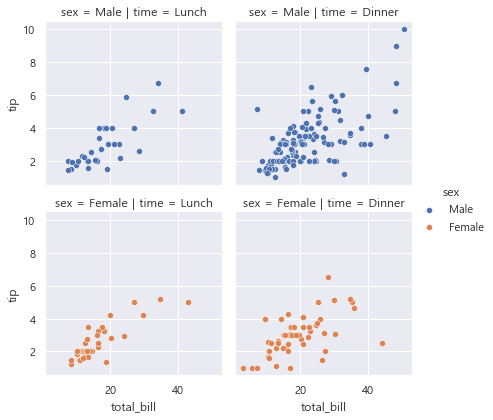

In [17]:
g = sns.FacetGrid(tips, col="time", row="sex", hue="sex")
g.map(sns.scatterplot, "total_bill", "tip" )
g.add_legend()

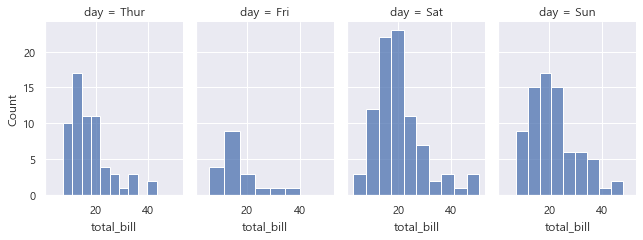

In [23]:
g = sns.FacetGrid(tips, col="day", height=3.5, aspect=.65)
g.map(sns.histplot, "total_bill")

#### - pairplot : 두 가지 변수 조합을 한 번에 확인하는 방법
data를 통째로 지정하면 숫자형 특성의 데이터에 대해서 히스토그램과 scatter plot으로 나타냄

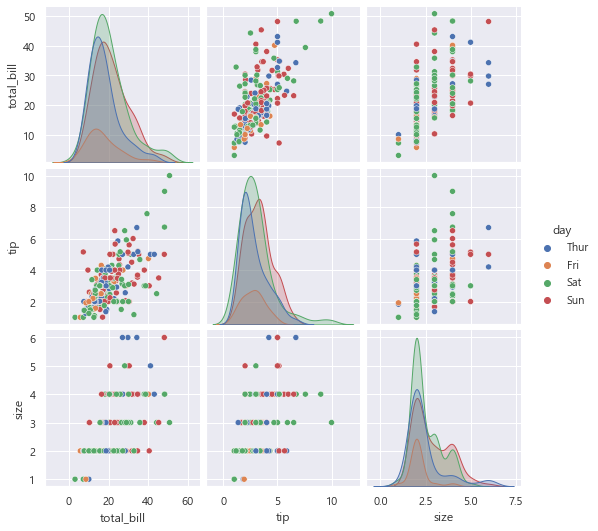

In [27]:
sns.pairplot(data=tips, hue='day')

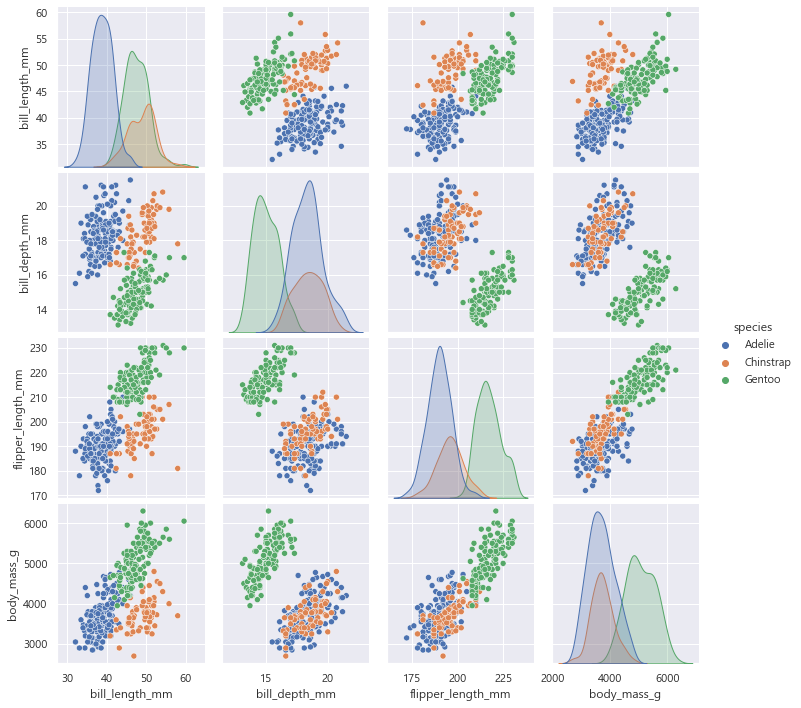

In [30]:
penguins = sns.load_dataset("penguins")
penguins
sns.pairplot(data=penguins, hue='species')

#### - jointplot :  두 가지 plot을 한 번에 보는 방법, 
kind 옵션으로 plot을 종류를 변경할 수 있다. DataFrame형태에 사용

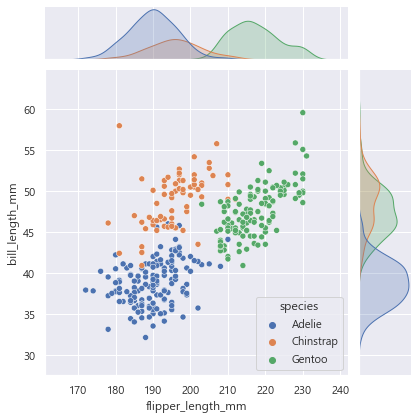

In [40]:
penguins.head(3)

sns.jointplot(data=penguins, hue='species',
              x='flipper_length_mm', y='bill_length_mm')

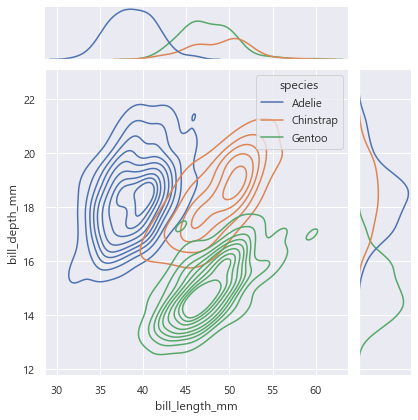

In [43]:
sns.jointplot(data=penguins, hue='species',
              x="bill_length_mm", y="bill_depth_mm", kind="kde")

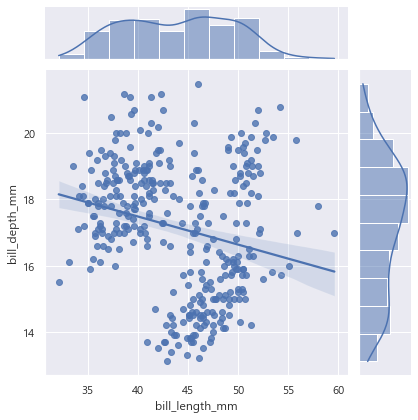

In [45]:
sns.jointplot(data=penguins, 
              x="bill_length_mm", y="bill_depth_mm", kind="reg")

### Relation Plot : 연속데이터, 관련성 확인

#### - relplot : 데이터 관련성 보여줌. 
- kind옵션으로 그래프 모양 지정할 수 있음(scatter/line)
- default: kind='scatter'

Text(0.5, 1.0, 'Total bill & tip')

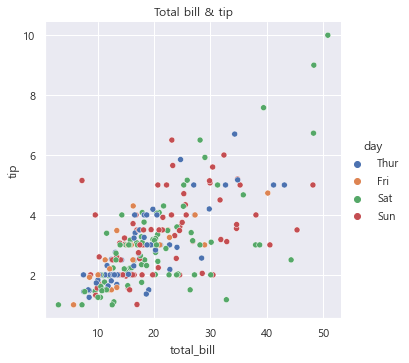

In [47]:
# default: kind='scatter'
sns.relplot(data=tips, x="total_bill", y="tip", hue="day")
plt.title('Total bill & tip')

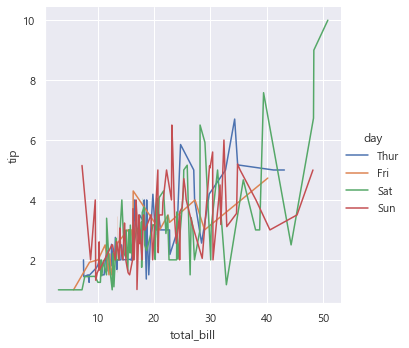

In [48]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", 
           kind='line')

#### - scatterplot

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

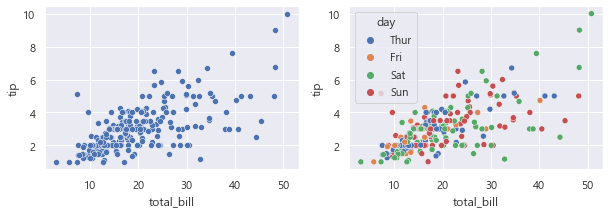

In [55]:
plt.figure(figsize=(10,3))
plt.subplot(121)
sns.scatterplot(data=tips, x="total_bill", y="tip")
plt.subplot(122)
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="day")

#### - lineplot

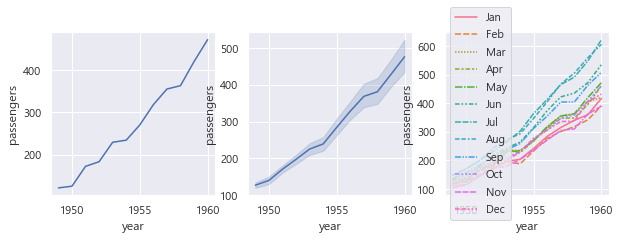

In [64]:
flights = sns.load_dataset("flights")
flights.head() # year	month	passengers

may_flights = flights.query("month == 'May'")

plt.figure(figsize=(10,3))
# 6월 년도별 승객수
plt.subplot(131)
sns.lineplot(data=may_flights, x="year", y="passengers")

# 전체 년도별 승객수
plt.subplot(132)
sns.lineplot(data=flights, x="year", y="passengers")

# 전체 년도별 월별 승객수
plt.subplot(133)
sns.lineplot(data=flights, x="year", y="passengers",
             hue='month', style='month')
plt.legend(loc='center left')

### Distribution Plot : 데이터 분포 확인

#### - displot : 데이터 분포 확인
- kind 옵션으로 그래프 지정할 수 있다.
- default : kind='hist'

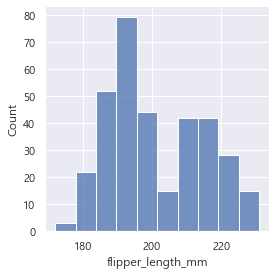

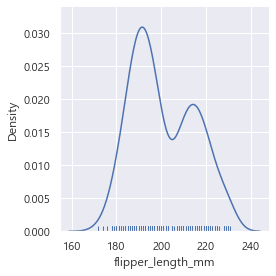

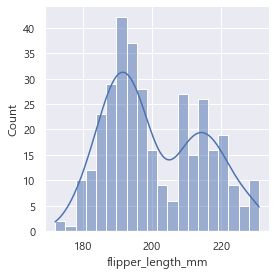

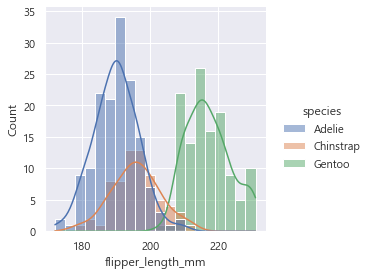

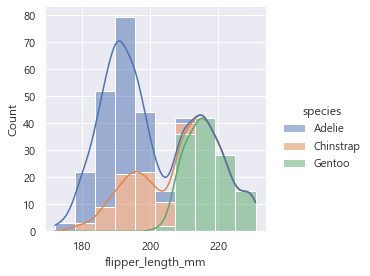

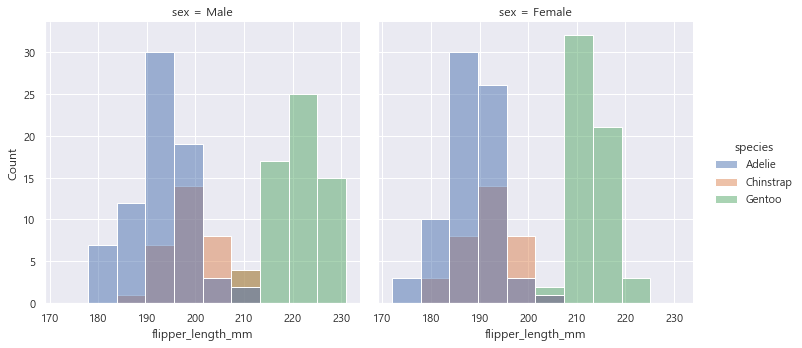

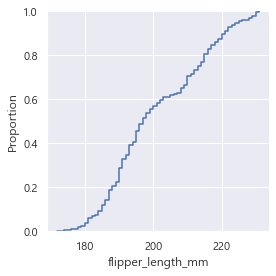

In [82]:
penguins = sns.load_dataset("penguins")
sns.displot(data=penguins, x="flipper_length_mm", height=4)
sns.displot(data=penguins, x="flipper_length_mm", 
            kind='kde', rug=True, height=4 )
sns.displot(data=penguins, x="flipper_length_mm", 
            kde=True, bins=20, height=4 )
sns.displot(data=penguins, x="flipper_length_mm", hue='species', 
            kde=True, bins=20, height=4 )
sns.displot(data=penguins, x="flipper_length_mm", hue='species', 
            multiple='stack', kde=True, height=4 )
sns.displot(data=penguins, x="flipper_length_mm", hue="species", 
            col="sex", kind="hist")
sns.displot(data=penguins, x="flipper_length_mm", kind="ecdf", height=4)

#### - histplot : 히스토그램그래프

<AxesSubplot:xlabel='Count', ylabel='flipper_length_mm'>

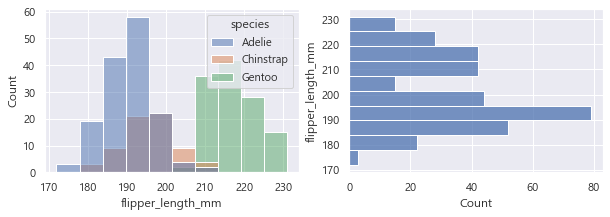

In [95]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.histplot(data=penguins, x="flipper_length_mm", hue="species",)
plt.subplot(1,2,2)
sns.histplot(data=penguins, y="flipper_length_mm")

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

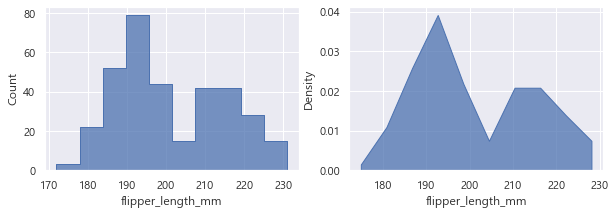

In [94]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.histplot(data=penguins, x="flipper_length_mm", element="step")
plt.subplot(1,2,2)
sns.histplot(data=penguins, x="flipper_length_mm", 
             element="poly", stat="density")

#### - kdeplot : kernel density estimates 커널밀도추정
- 커널 밀도(kernel density) 함수를 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선으로 보여주는 방법
- Gaussian kernel density estimation, 연속된 곡선형태의 그래프 표현

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

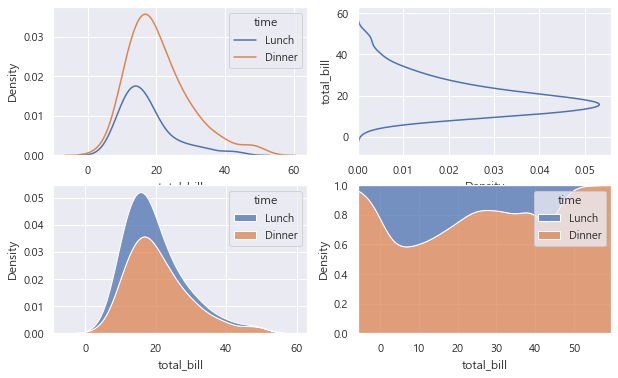

In [101]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.kdeplot(data=tips, x="total_bill", hue="time",)
plt.subplot(2,2,2)
sns.kdeplot(data=tips, y="total_bill")
plt.subplot(2,2,3)
sns.kdeplot(data=tips, x="total_bill", hue="time", multiple="stack")
plt.subplot(2,2,4)
sns.kdeplot(data=tips, x="total_bill", hue="time", multiple="fill")

#### - ecdfplot : empirical cumulative distribution function
(경험적)누적분포 형태의 그래프

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Proportion'>

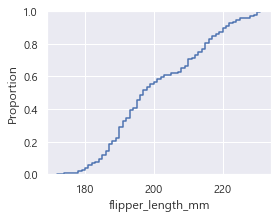

In [103]:
sns.ecdfplot(data=penguins, x="flipper_length_mm")

#### - rugplot : 작은 선분을 나타내는 그래프 형태
다른 그래프와 함께 사용하고 실제 데이터의 위치를 보여줌

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

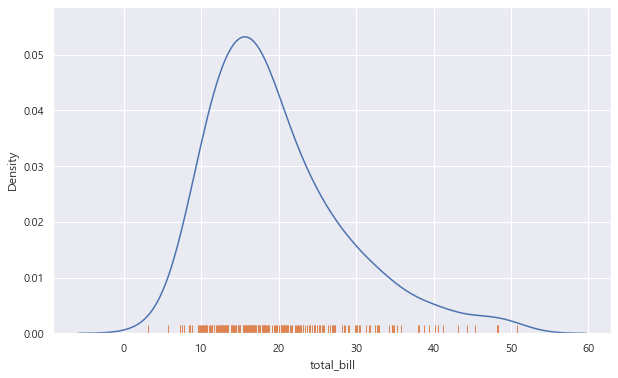

In [105]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=tips, x="total_bill")
sns.rugplot(data=tips, x="total_bill")

#### - distplot : 

c:\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\python\python38\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

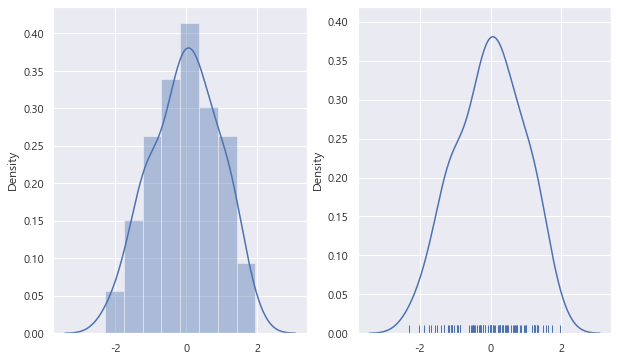

In [109]:
import numpy as np

x = np.random.randn(100)

plt.figure(figsize=(10,6))
plt.subplot(121)
sns.distplot(x)
plt.subplot(122)
sns.distplot(x, rug=True, hist=False)

### Categorical Plot : 범주형(categorical) 데이터, 데이터의 변화 확인

#### - catplot 
- default : kind='strip'

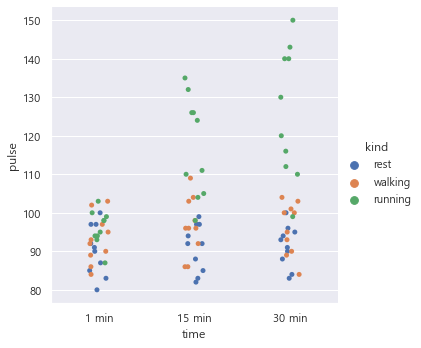

In [116]:
exercise = sns.load_dataset("exercise")
exercise # id	diet	pulse	time	kind
g = sns.catplot(x="time", y="pulse", hue="kind", data=exercise)

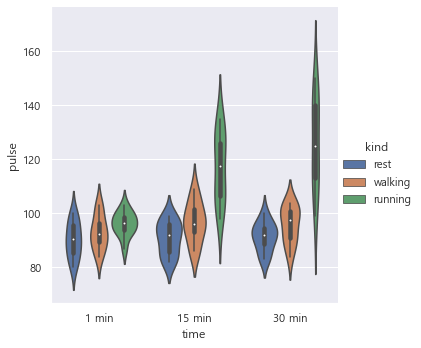

In [117]:
sns.catplot(x="time", y="pulse", hue="kind", 
            data=exercise, kind='violin')

#### - stripplot
- scatter 그래프로 표시되는데 범주형 데이터로 표시해준다.
- 연속형 변수와 범주형 변수 사이의 그래프

<AxesSubplot:xlabel='smoker', ylabel='total_bill'>

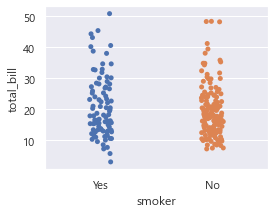

In [118]:
sns.stripplot(data=tips, x='smoker', y='total_bill')

#### - swarmplot : 
- stripplot, violinplot의 조합, 데이터의 포인트와 데이터의 분포도 함께 확인할 수 있음

<AxesSubplot:xlabel='smoker', ylabel='total_bill'>

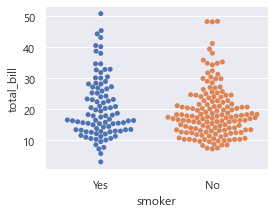

In [120]:
sns.swarmplot(data=tips, x='smoker', y='total_bill')

#### - violinplot
- boxplot의 분포에 대한 정보 보충해 줌

<AxesSubplot:xlabel='smoker', ylabel='total_bill'>

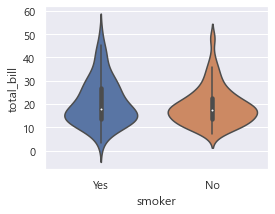

In [121]:
sns.violinplot(data=tips, x='smoker', y='total_bill')

#### - boxplot
- 특이치(outlier)를 발견할 수 있다.

<AxesSubplot:xlabel='smoker', ylabel='total_bill'>

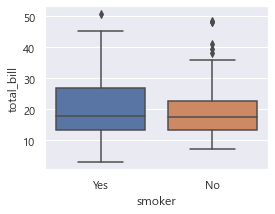

In [123]:
sns.boxplot(data=tips, x='smoker', y='total_bill')

#### - boxenplot

<AxesSubplot:xlabel='smoker', ylabel='total_bill'>

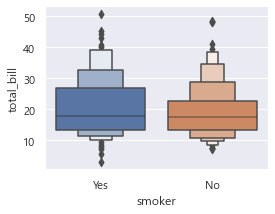

In [131]:
sns.boxenplot(data=tips, x='smoker', y='total_bill')

#### - countplot
- 각 범주의 개수(count) 나타냄

<AxesSubplot:xlabel='day', ylabel='count'>

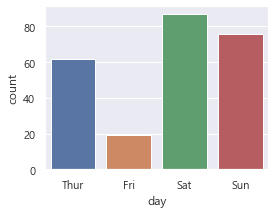

In [129]:
sns.countplot(data=tips, x='day')

#### - barplot
- 막대높이(평균), errorbar(데이터의 편차)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

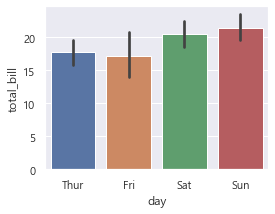

In [130]:
sns.barplot(data=tips, x='day', y='total_bill')

#### - pointplot

<AxesSubplot:xlabel='time', ylabel='total_bill'>

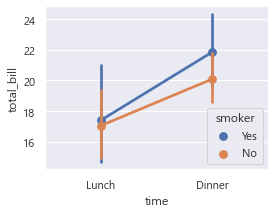

In [133]:
sns.pointplot(x="time", y="total_bill", hue="smoker",
                   data=tips)

### Regression Plot : 데이터 분포, 회귀(선)
- 선형회귀분석(머신러닝) 결과를 그래프로 보여준다.

#### - lmplot
- default: scatter=True

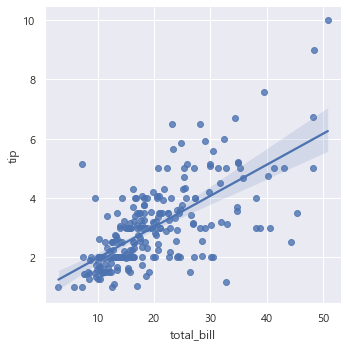

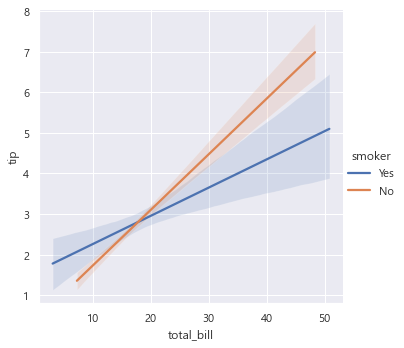

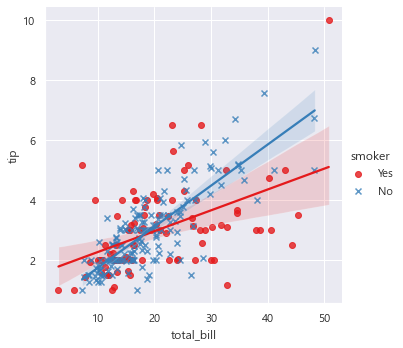

In [138]:
sns.lmplot(data=tips, x="total_bill", y="tip")
sns.lmplot(data=tips, x="total_bill", y="tip", hue="smoker",
          scatter=False)
sns.lmplot(data=tips, x="total_bill", y="tip", hue="smoker",
           markers=["o", "x"], palette="Set1")

#### - regplot : 선형회귀 그래프
- 선형적인 관계가 있는 데이터를 직선으로 그어 확인하는 방법

<AxesSubplot:xlabel='x', ylabel='y'>

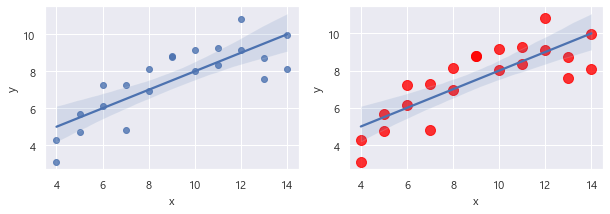

In [153]:
# 통계 학자 이름을 따서 만든 Dataset 
anscombes
plt.figure(figsize=(10,3))
plt.subplot(121)
sns.regplot(data=anscombes.query("dataset in ('I', 'II')"), 
           x="x", y="y")
plt.subplot(122)
sns.regplot(data=anscombes.query("dataset in ('I', 'II')"), 
           x="x", y="y", scatter_kws={"s":100,'color':'red'})

#### - residplot
- 잔차(residual)분석 

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

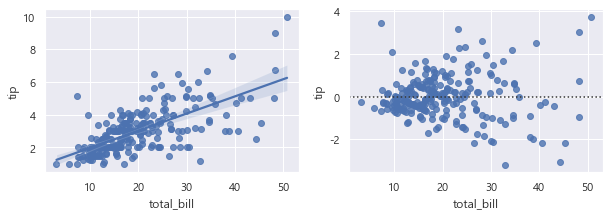

In [159]:
plt.figure(figsize=(10,3))
plt.subplot(121)
sns.regplot(data=tips, x="total_bill", y="tip")
plt.subplot(122)
sns.residplot(data=tips, x="total_bill", y="tip")

### Matirx Plot : 여러 가지 변수 비교

#### - heatmap 
- 데이터 간의 수치에 따라 색상을 입힘으로써 직관적으로 통찰을 얻을 수 있음
- 결측치를 시각적으로 확인할 경우에 사용할 수 있다.

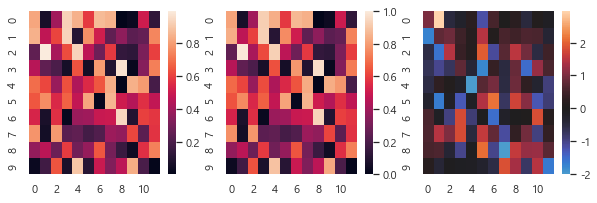

In [163]:
plt.figure(figsize=(10,3))

plt.subplot(131)
uniform_data = np.random.rand(10, 12)
sns.heatmap(uniform_data)

plt.subplot(132)
sns.heatmap(uniform_data, vmin=0, vmax=1)

plt.subplot(133)
normal_data = np.random.randn(10, 12)
ax = sns.heatmap(normal_data, center=0)

<AxesSubplot:xlabel='year', ylabel='month'>

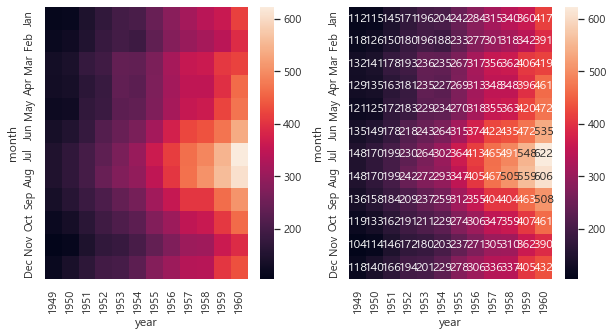

In [171]:
plt.figure(figsize=(10,5))
flights = sns.load_dataset("flights")
flights

plt.subplot(121)
flights = flights.pivot("month", "year", "passengers")
sns.heatmap(flights)

plt.subplot(122)
sns.heatmap(flights, annot=True, fmt="d")

<AxesSubplot:xlabel='year', ylabel='year'>

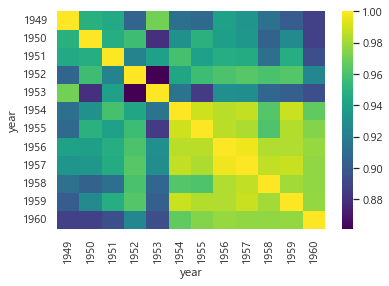

In [176]:
plt.figure(figsize=(6,4))
sns.heatmap(flights.corr(), cmap='viridis')

<AxesSubplot:xlabel='year', ylabel='month'>

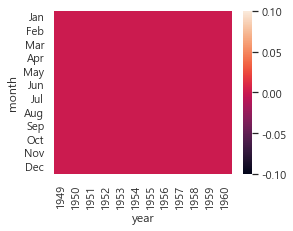

In [178]:
# 결측치 확인할 수 있다.
sns.heatmap(flights.isnull() )

#### - clustermap
- hierarchically-clustered heatmap 
- 데이터의 유사성에 따라 몇몇 특징들을 그룹화할 필요가 있을 때 사용하는 그래프유형

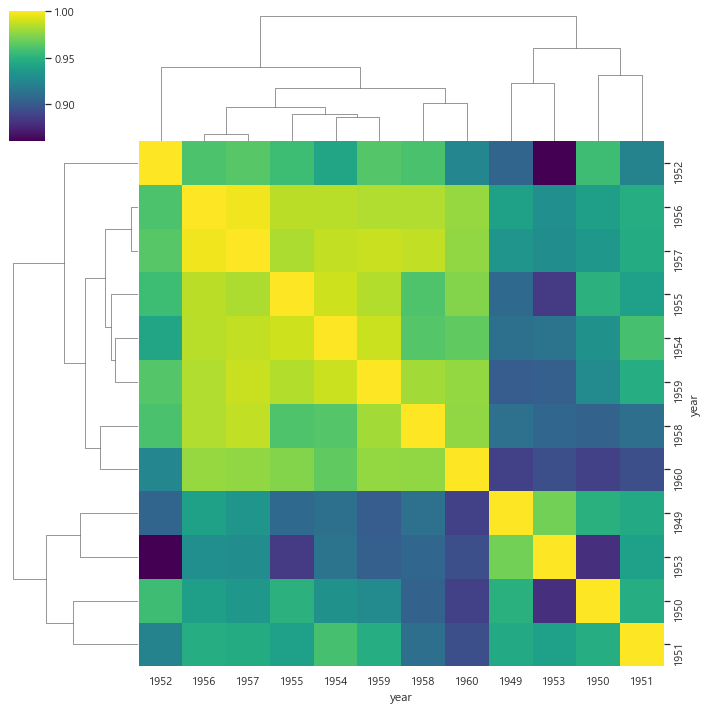

In [180]:
sns.clustermap(flights.corr(), cmap='viridis')

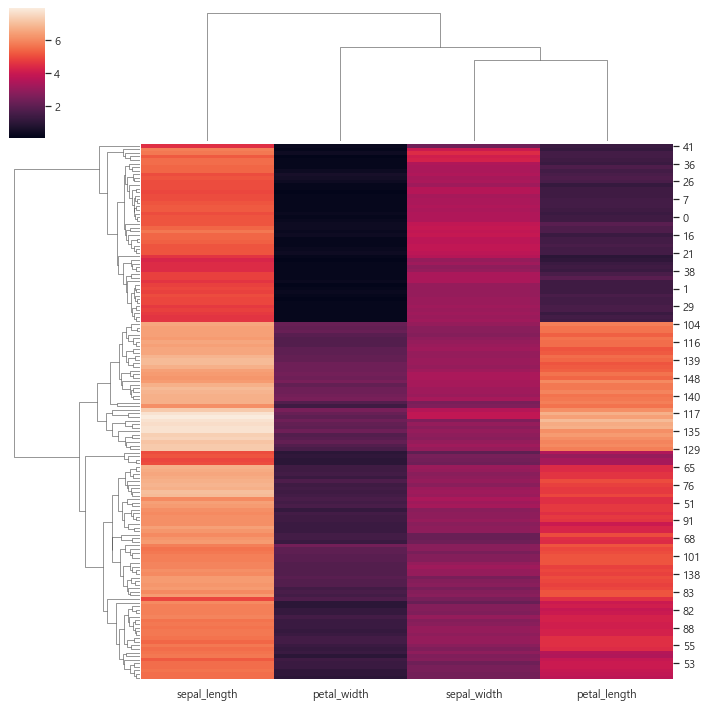

In [181]:
iris = sns.load_dataset("iris")
species = iris.pop("species")
sns.clustermap(iris)